# House Price Prediction

In [1]:
import pandas as pd

In [2]:
def load_housing_data(csv_path = './housing.csv'):
#     csv_path = './housing.csv'
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## See info

In [5]:
housing.info()

**Ocean_proximity is oject (i.e. string, since it came from csv).**

## Let's see each category and their counts in ocean_proximity

In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Now to see description of numeric fields

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**25% (1st quartile), 50% (median), 75% (3rd quartile) <br> 
For eg. housing_median_age, at 25% is 18.000. <br> 
It means 25% of the data pts have housing_median_age less than or eq to 18.000**

## Plotting

In [8]:
import matplotlib.pyplot as plt

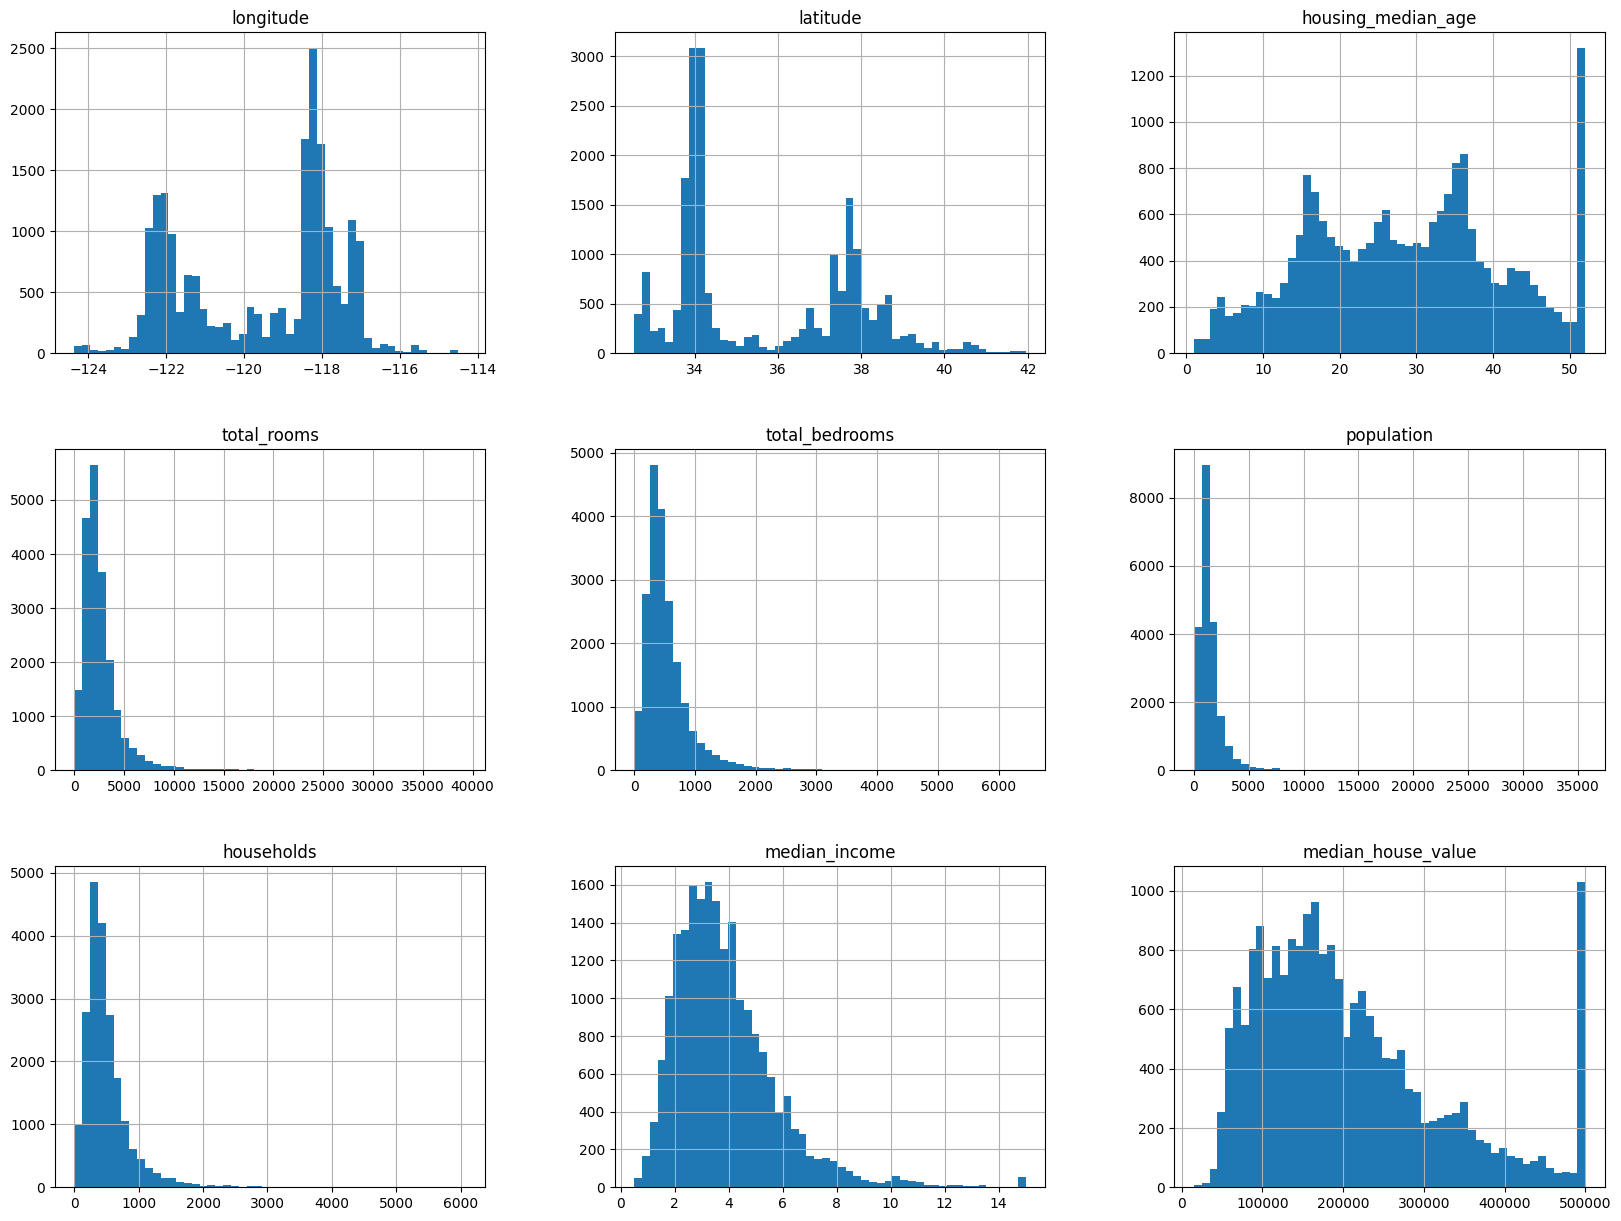

In [9]:
# matplotlib requires user specified graphical backened.
#use jupyter's own backend
%matplotlib inline 

housing.hist(bins=50, figsize=(20, 15))
plt.show()

__X axis respresents the values of the attribute.<br>
Y axis represents the count (nos.) of that attribute at that given pt (on X axis)__

## Train Test Split

In [10]:
import numpy as np

In [11]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) #return random perm of nos from 0 - len(data)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), len(test_set))

16512 4128


__But this will give different output in diff run (and subsequently our ML model will see the whole data set) <br><br>
To prevent this <br>
np.random.seed(42)  #or any other number <br>
before using np.random.permutation__

### Another Way

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

___or split based on an unique identifier (so that it won't break if dataset is updated)___

### Stratified Split

The above processes may introduce sampling bais (if dataset is not large enough compared to the no. of attributes) <br><br>
The stats of the whole data set should be preserved in the split data sets <br>
For eg, if whole data set has 48.7% males and 51.3% females <br>
The train and test data sets should also contain the same percentage of male and female. <br><br>
This is called **stratified sampling**. <br>
The population is split into homogenous subgroups called **strata** and the right no. of instances are sampled from each stratum to guarrentee that the test set is representative of the overall population.

in our case **median_incomne** is important and the test set should be represenative of the income distribution. <br><br>
But it is continous. So we make it into **categorical attribute** using **pd.cut**<br>
From histogram we see that median income is centered aroung 1.5 - 6 <br><br>
There should be sufficient no. of instances in each stratum <br>
And the no. of strata should not be too much. Here we make **5** strata.

In [15]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0., 1.5, 3.0, 4.5, 6., np.inf], #majority is less than 6
                              labels=[1, 2, 3, 4, 5])

In [16]:
housing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

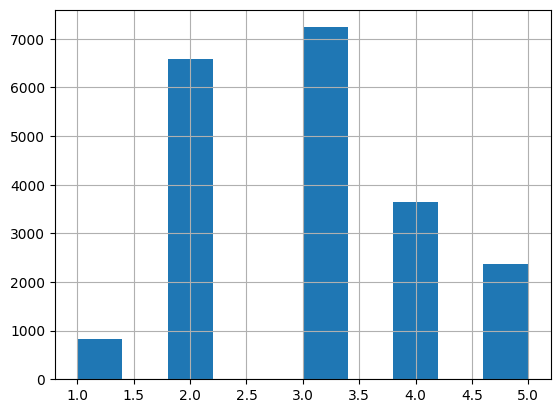

In [17]:
housing['income_cat'].hist()
plt.show()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

In [19]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [20]:
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [21]:
split.split(housing, housing['income_cat'])

<generator object BaseShuffleSplit.split at 0x7fe36b664ac0>

In [22]:
for train_index, test_index in split.split(housing, housing['income_cat']):
#     print(test_index) #prints a list
#     print('xD')  # after list prints. in the func n_splits = 1 == no of loops that occur here
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#### Now check if the stats are preserved

In [23]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [24]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

**They are similar ^**

### Now drop the categorical column that we added

In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [26]:
#i = (strat_train_set, strat_test_set).__iter__()

In [27]:
#i.__next__()

**Note for self**
getting iterator on a dataFrame (like strat_train_set) would allow us to access the col names (like latitute) and not the rows and data in them<br><br>
But (strat_train_set, strat_test_set) is a **tuple**. <br>
An iterator on this object will give us the whole dataFrames one by one (first ***strat_train_set***, the ***strat_test_set***)

## Plotting Geographical Data

In [28]:
housing1 = strat_train_set.copy() #for safety. xD

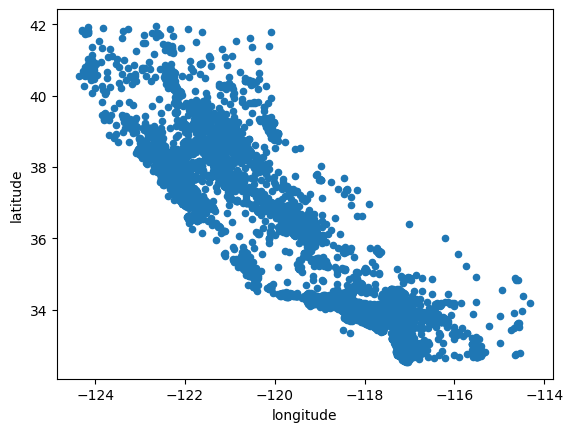

In [29]:
housing1.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

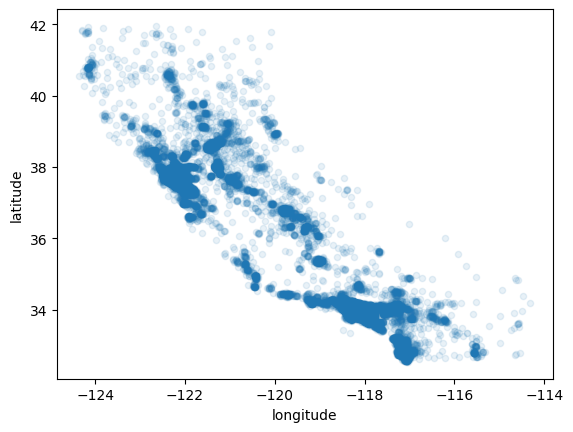

In [30]:
housing1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1) 
#makes easy to visualise places with high density of data pts

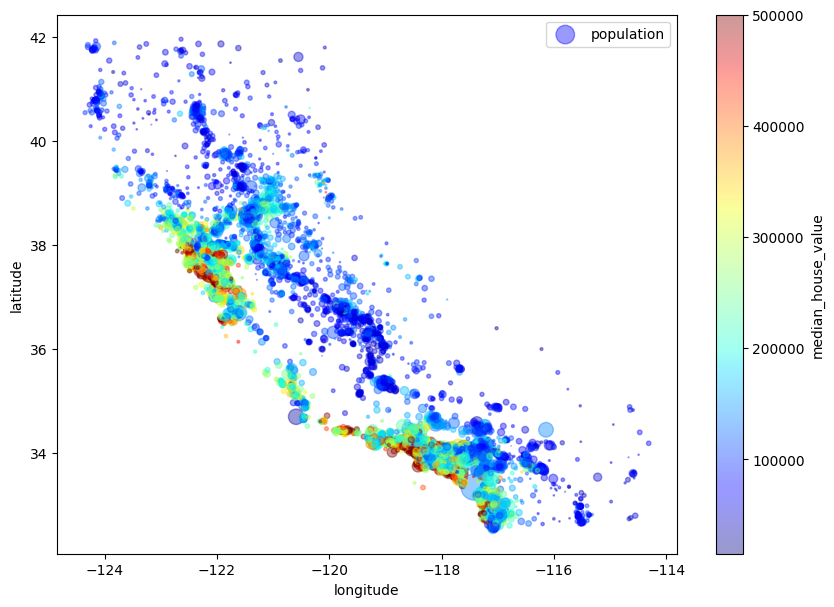

In [31]:
# radius of each circle -> population (option s)
# color of circle -> price (option c)
# we use predefined color map (cmap) called 'jet'

housing1.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing1['population']/100, label='population',
             figsize=(10, 7), c='median_house_value',
             cmap=plt.get_cmap('jet'), colorbar=True
             )
plt.legend()

## Looking For Correlations

In [32]:
# standard correlation coeff (Pearson's r)
# between every pair of attributes
corr_matrix = housing1.corr(numeric_only=True)

# with respect to 'median_house_value'
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [33]:
# corr_matrix #(n X n matrix (dataframe))

*price decrease towards north. if income is more, house price is more ... etc ...*

In [34]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

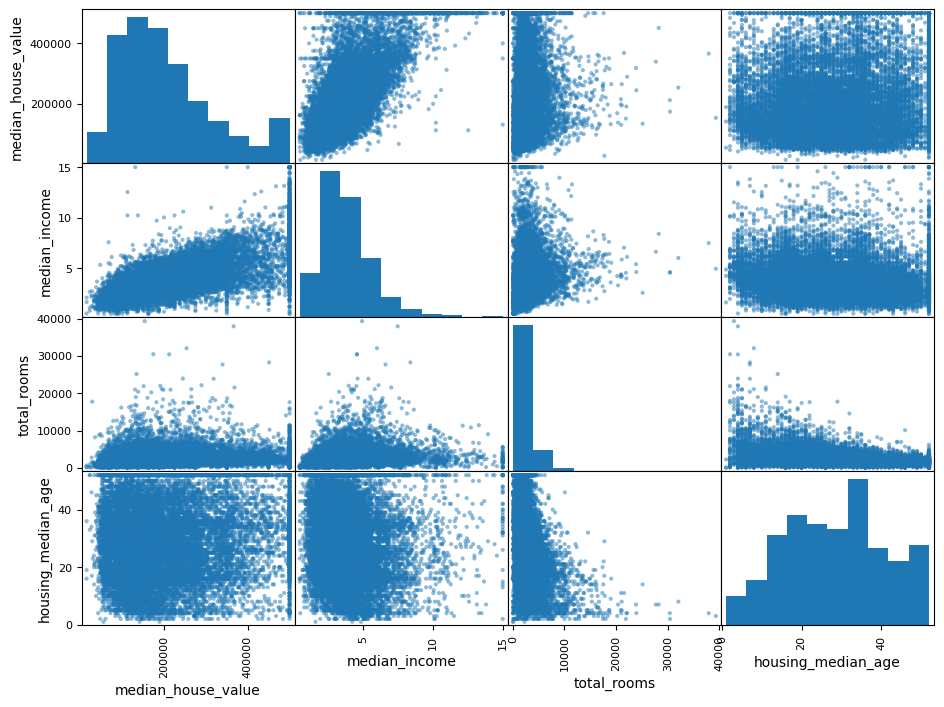

In [35]:
# scatter_matrix can plot for all pair of values.
# we select a few

attributes = ['median_house_value', 'median_income',
             'total_rooms', 'housing_median_age']
scatter_matrix(housing1[attributes], figsize=(11, 8))
# the principal diag would have all straight line plots (useless)
# so scatter_matrix() plots histogram instead
# plt.show()

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

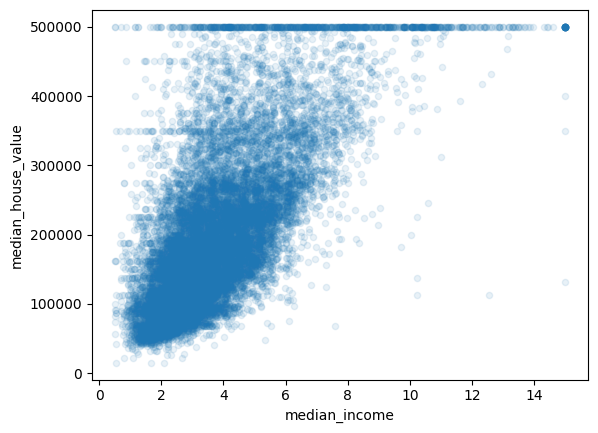

In [36]:
# The most promising one looks median_house_val vs median_income

housing1.plot(kind='scatter', x='median_income', 
              y='median_house_value', alpha=0.1)

**Horizontal line** around 5K denotes the price cap <br>
other horizontal lines around \$ 4.5 K and \$ 3.5 K <br>
We may want to remove these corresponding districts to prevent the algorithm from reproducing these data quirks

## Adding New Attributes

In [37]:
# rooms per household is better measure than tot rooms in district
# bedrooms per room is better measure than tot bedrooms in district
# etc
housing1['rooms_per_household'] = housing1['total_rooms'] / housing1['households']
housing1['bedrooms_per_room'] = housing1['total_bedrooms'] / housing1['total_rooms']
housing1['population_per_household'] = housing1['population'] / housing1['households']

In [38]:
corr_matrix = housing1.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

**We see our new attributes have better correlation with median_house_value than the previous ones**

## Prepare Data

In [39]:
# going back to the original data set
# coz the book says so
housing2 = strat_train_set.drop('median_house_value', axis=1)
housing2_labels = strat_train_set['median_house_value'].copy()

In [40]:
#### tot_bedroom had null values

## 3 ways
# 1 (delete rows where null value exists)
# housing2.dropna(subset=['total_bedrooms'])

# 2 (remove the entire total_bedrooms column)
# housing2.drop('total_bedrooms', axis=1)

# 3 (replace null values with median)
## use this same median to fill in null vals of test dataset
# median = housing2['total_bedrooms'].median()  
# housing2['total_bedrooms'].fillna(median, inplace=True)***

In [41]:
## Or, use sklearn

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy='median')

In [44]:
# median can only be calculated on numeric attributes
# so create a copy of the dataset without non numeric attr

housing2_num = housing2.drop('ocean_proximity', axis=1)

In [45]:
# only total_bedrooms attr had missing data
# but we apply imputer to entire data coz we don't
# know what will hapeen when the dataset gets updated
imputer.fit(housing2_num)

SimpleImputer(strategy='median')

In [46]:
# imputer calculates the median of each val
# and stores in statistics_ instance variable

imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [47]:
housing2_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [48]:
X = imputer.transform(housing2_num)

In [49]:
X  # numpy arr

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [50]:
# can convert back to pd.DataFrame
housing2_tr = pd.DataFrame(X, columns=housing2_num.columns,
                          index=housing2_num.index)

In [51]:
housing2_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


## Handling Categorical Attributes

In [52]:
housing2_cat = housing2[['ocean_proximity']]
# [] returns Series
# [[]] returns DataFrame

In [53]:
# type(housing2_cat)

In [54]:
housing2_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Ordinal Encoding

In [55]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
ordinal_encoder = OrdinalEncoder()
housing2_cat_encoded = ordinal_encoder.fit_transform(housing2_cat)
housing2_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Drawbacks 
does not give proper sense of closeness. <br>
1H OCEAN is encoded as 0 <br>
INLAND as 1 <br>
... <br>
NEAR OCEAN as 4 <br> <br>

But ***'NEAR OCEAN'*** is closer to ***'1H OCEAN'*** than ***'INLAND'*** is

### One Hot Encoding

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
cat_encoder = OneHotEncoder()
housing2_cat_1hot = cat_encoder.fit_transform(housing2_cat)
housing2_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [60]:
# convert to numpy array
housing2_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [61]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

To work seamlessly with other scikitklearn functions <br><br>

Create a class and implement 3 methods ***fit()*** (returning self) ***transform()*** and ***fit_transform()*** <br>
We get the last one for free if we inherit from the **TransformerMixin** class. <br><br>

If we also inherit from **Base Estimator** (and avoid \*args and \*\*kwargs in our constructor), <br>
we also get 2 extra methods -> ***get_params()*** and ***set_params()*** (useful for automatic hyperparameter tuning) 

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin

In [63]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [64]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [65]:
attr_adder

CombinedAttributesAdder(add_bedrooms_per_room=False)

In [66]:
housing2_extra_attrib = attr_adder.transform(housing2.values)

In [67]:
# housing2.values # returns np array

In [68]:
housing2_extra_attrib

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [69]:
# cols = list(housing2.columns) + ['rooms_per_household', 'population_per_household']
# pd.DataFrame(housing2_extra_attrib, columns=cols, index=housing2.index)

## Feature Scaling

In [70]:
# MinMaxScaler or StandardScaler

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
s = StandardScaler()
x = s.fit_transform(housing2_num)
x

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

## Transformation Pipeline

In [73]:
from sklearn.pipeline import Pipeline

In [74]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrins_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

Constructor takes an array of tuples <br>
All except maybe last estimator should be transformers <br>
The pipeline calls ***fit_transform()*** on every estimator except last one <br>
The pipeline exposes same methods as the last estimator <br>
Estimator names can be anything (as long as they are **unique** and not not conatin **double underscore \__**)

In [75]:
housing2_num_tr = num_pipeline.fit_transform(housing2_num)

In [76]:
housing2_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

### To Handle Categorical and Numerical Attributes Together ...

In [77]:
from sklearn.compose import ColumnTransformer

In [78]:
num_attribs = list(housing2_num)
cat_attribs = ['ocean_proximity']

cat_enc = OneHotEncoder()
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs) # or use cat_enc here
])

In [79]:
housing2_prepared = full_pipeline.fit_transform(housing2)

In [80]:
housing2_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

Instead of specifying a transformer <br>
Specify the string **'drop'** if we want the columns to be dropped <br>
or **'pass through'** if we want the columns to be left untouched <br> <br>
By default, <br>
Remaing columns (which are not mentioned) are **dropped**<br>
We can set the remainder hyperparameter to any transformer (or to **'passthrough'**) if we want the cols to be handled differently.

## Train

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lin_reg = LinearRegression()
lin_reg.fit(housing2_prepared, housing2_labels)

LinearRegression()

In [83]:
some_data = housing2.iloc[:5]
some_labels = housing2_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Labels: ', list(some_labels))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [84]:
from sklearn.metrics import mean_squared_error

#### In-sample Error

In [85]:
housing2_predictions = lin_reg.predict(housing2_prepared)
lin_mse = mean_squared_error(housing2_labels, housing2_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

### Decision Tree Regression

In [86]:
from sklearn.tree import DecisionTreeRegressor

In [87]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing2_prepared, housing2_labels)

DecisionTreeRegressor()

#### In-sample Error

In [88]:
housing2_predictions = tree_reg.predict(housing2_prepared)
tree_mse = mean_squared_error(housing2_labels, housing2_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Over Fitting** (Maybe) ^

## Cross-Validation

In [89]:
# We keep a small part of train set for validation.
# Repeat this k times with diff validation sets

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
# scores = cross_val_score(tree_reg, housing2_prepared,
#                         housing2_labels, scoring='neg_mean_squared_error',
#                         cv=10)
# also works
scores = cross_val_score(DecisionTreeRegressor(), housing2_prepared,
                        housing2_labels, scoring='neg_mean_squared_error',
                        cv=10) # 10 fold cross validation

In [92]:
tree_rmse_scores = np.sqrt(-scores)

sklearn's validation feature expects a **utility function** (greater is better) rather than a **cost function** (lesser is better). <br>
So the scoring func is opposite of MSE (ie **negative MSE**). <br>
So we do np.sqrt(-scores)

In [93]:
def display_scores(score):
    print('Scores: ', score)
    print('Mean: ', score.mean())
    print('Standard Deviation: ', score.std())

In [94]:
display_scores(tree_rmse_scores)

Scores:  [72928.81689994 69905.46845225 67736.83442307 70173.4706294
 69094.00003168 76435.1156725  70025.98117165 72938.98490266
 68232.93055879 71890.812505  ]
Mean:  70936.24152469456
Standard Deviation:  2500.8197953609197


**Non 0 error**

### Linear Regression with Cross-Validation

In [95]:
scores_lin = cross_val_score(LinearRegression(), housing2_prepared,
                            housing2_labels, scoring='neg_mean_squared_error',
                            cv=10)

In [96]:
lin_rmse_scores = np.sqrt(-scores_lin)

In [97]:
display_scores(lin_rmse_scores)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Deviation:  2880.3282098180694


**## Decision Tree is performing worse than Linear Regression due to overfitting**

## Random Forest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
forest_reg = RandomForestRegressor()

forest_reg.fit(housing2_prepared, housing2_labels)

RandomForestRegressor()

#### In-sample Error

In [100]:
housing2_predictions = forest_reg.predict(housing2_prepared)
forest_mse = mean_squared_error(housing2_labels, housing2_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18772.030706185174

### Cross-Validation

In [101]:
scores_forest = cross_val_score(RandomForestRegressor(), housing2_prepared,
                               housing2_labels, scoring='neg_mean_squared_error',
                               cv=10)

In [102]:
forest_rmse = np.sqrt(-scores_forest)

In [103]:
display_scores(forest_rmse)

Scores:  [51399.05445742 48679.97473273 46679.4832476  52247.98814612
 47061.62775983 51940.3727087  52461.65904767 49909.77173122
 48246.26035636 53782.36236503]
Mean:  50240.855455267825
Standard Deviation:  2346.227624545286


**Random Forest performs better**

## Fine Tuning

We can fine tune our model by chosing different values of the hyperparameters. <br>
We can use **GridSearchCV** or **RandomizedSearchCV**
<br><br>
**GridSearchCV** will do cross validation to evaluate all the possible combination of hyper parameter values (from the list provided)

### GridSearchCV

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = [
    {
        'n_estimators': [3, 10, 30],
        'max_features': [2, 4, 6, 8]
    },
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [2, 3, 4]
    }
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

In [106]:
grid_search.fit(housing2_prepared, housing2_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

**param_grid** is a **list of dictionaries** <br>
it tells sklearn to evaluate <br>
all 3 X 4 = 12 combinations of ***n_estimators*** and ***max_features*** hyper parameters in the first dict. <br>
and 2 X 3 = 6 combinations of hyper parameter values in the second dict.
<br><br>
ie 12 + 6 = 18
<br><br>
cv = 5, means **cross validation 5 times**.
<br><br>
therefore, no. of training rounds = 18 X 5 = **90**

In [107]:
# best combination of hyper parameter
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [108]:
# get the best estimator directly
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [109]:
# evaluation scores
cvres = grid_search.cv_results_
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [110]:
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63273.66955927675 {'max_features': 2, 'n_estimators': 3}
55382.39852513334 {'max_features': 2, 'n_estimators': 10}
52848.43922048276 {'max_features': 2, 'n_estimators': 30}
60903.94446026712 {'max_features': 4, 'n_estimators': 3}
52693.345954306096 {'max_features': 4, 'n_estimators': 10}
50399.88249291672 {'max_features': 4, 'n_estimators': 30}
58851.27383038806 {'max_features': 6, 'n_estimators': 3}
52369.62190715339 {'max_features': 6, 'n_estimators': 10}
50160.78254392673 {'max_features': 6, 'n_estimators': 30}
58698.44345830117 {'max_features': 8, 'n_estimators': 3}
52239.472586957716 {'max_features': 8, 'n_estimators': 10}
50351.54063006674 {'max_features': 8, 'n_estimators': 30}
63032.11788739821 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54813.910235321644 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59261.17053785971 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52092.71929024241 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [111]:
# cvres # dict. key: value. (all values are array of 18 elem)

The best estimator was <br>
*{'max_features': 8, 'n_estimators': 30}* <br>
Which is the **highest** val in the hyperparams we provided <br><br>

So we may try GridSearchCV again with higher values of the hyperparameters to see if there is any more improvement


GridSearchCV suitable for exploring relatively **few combinations of hyper paramter values***. <br>
**When hyperparameter search space is large, it is preferable to use RamdomizedSearchCV.**

### RandomizedSearchCV

It evaluates a given no. of random combinations by selecting a random value of each hyperparameter in each iteration.

## Analyse Best Model

### Find The Important Features

In [112]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.31860398e-02, 7.33497114e-02, 4.00858397e-02, 1.74642489e-02,
       1.58839939e-02, 1.73393969e-02, 1.59457200e-02, 3.17160945e-01,
       6.89764708e-02, 1.10943588e-01, 7.26974513e-02, 1.16363546e-02,
       1.47800254e-01, 8.20908563e-05, 3.40332484e-03, 4.04456956e-03])

In [113]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bdrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.31716094546400553, 'median_income'),
 (0.14780025368066282, 'INLAND'),
 (0.11094358836326317, 'pop_per_hhold'),
 (0.08318603978176052, 'longitude'),
 (0.07334971142971058, 'latitude'),
 (0.07269745134678646, 'bdrooms_per_room'),
 (0.06897647075976776, 'rooms_per_hhold'),
 (0.04008583973789735, 'housing_median_age'),
 (0.0174642488636006, 'total_rooms'),
 (0.017339396868415624, 'population'),
 (0.01594571999311998, 'households'),
 (0.01588399390739492, 'total_bedrooms'),
 (0.011636354551262157, '<1H OCEAN'),
 (0.004044569557189336, 'NEAR OCEAN'),
 (0.0034033248388917916, 'NEAR BAY'),
 (8.20908562713625e-05, 'ISLAND')]

In [114]:
full_pipeline.named_transformers_  # just to see what's inside

{'num': Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                 ('attrins_adder', CombinedAttributesAdder()),
                 ('std_scaler', StandardScaler())]),
 'cat': OneHotEncoder()}

##### Inference -
From feature importance <br>
We see ***median_income*** is most influencial. <br>
Only one ***ocean_proximity*** category is really useful. <br>
<br><br>
(We may remove the non important attributes)

## Test Model

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
X_test = strat_test_set.drop('median_house_value', axis=1)
Y_test = strat_test_set['median_house_value'].copy()

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)
# do NOT fit TEST data. ONLY transform
# the transformer sould be fitted with TRAINING data

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

In [ ]:
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

#### Calc 95% confidence interval for generalization error
**using scipy.stats.t.interval()**

In [ ]:
from scipy import stats

In [ ]:
confidence=0.95

squared_errors = (final_predictions - Y_test) ** 2

np.sqrt(stats.t.interval(
    confidence, len(squared_errors)-1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)
))